# **Brain Tumor Detection** Neural Network

***Team:***
#####Karime Kirey Sánchez Andrade 1914174
#####Daniela Michelle Alonso Carrillo 1804543 
#####Lázaro Gael Cortez Moncada 1902334
#####Erick Herrera Bautista 1914162


**Dataset source:** Kaggle; URL: *https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection*

# Import libraries

In [888]:
# Library import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import zipfile
import tensorflow_datasets as tfds




# Load dataset


In [889]:
#We created a Github repository containing the provided dataset. With this code, the zip file is opened in read mode and it is imported to
#the '/tmp' folder in this Google Colab notebook. It is loaded automatically everytime.

!wget --no-check-certificate \
    "https://github.com/karimekirey/brain_mri/archive/refs/heads/main.zip" \
    -O "/tmp/brain-mri-main.zip" 


zip_ref = zipfile.ZipFile('/tmp/brain-mri-main.zip', 'r') #Opens the zip file (brain-mri-main.zip) in read mode
zip_ref.extractall('/tmp')                                #Extracts the files into the /tmp folder
zip_ref.close()

--2022-11-26 05:04:30--  https://github.com/karimekirey/brain_mri/archive/refs/heads/main.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karimekirey/brain_mri/zip/refs/heads/main [following]
--2022-11-26 05:04:30--  https://codeload.github.com/karimekirey/brain_mri/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7909461 (7.5M) [application/zip]
Saving to: ‘/tmp/brain-mri-main.zip’

/tmp/brain-mri-main 100%[===================>]   7.54M  39.0MB/s    in 0.2s    

2022-11-26 05:04:30 (39.0 MB/s) - ‘/tmp/brain-mri-main.zip’ saved [7909461/7909461]



# Dataset division and pre-preprocessing
Training (80%) and Testing (20%)

In [890]:
# Load data in variable brain_mri

img_width = 100
img_lenght = 100

#TRAINING DATASET
brain_mri_Training = tf.keras.preprocessing.image_dataset_from_directory(
    '/tmp/brain_mri-main',        #place path here
    labels='inferred',            #Subfolder names inside main folder dictate the labels
    label_mode='int',             #Labels' format int
    #class_names=('no','yes'),    #Definition of class names
    color_mode='grayscale',             #Dataset has grayscale images
    batch_size=10000,
    image_size=(img_width, img_lenght),          
    shuffle=True,
    seed=10,                      #filler argument value of 'seed'. We assigned a random number
    validation_split=0.2,         #20% of the data will be for testing, 80% for training
    subset='training',
    interpolation='bilinear',     #method for resizing images
    crop_to_aspect_ratio=False
)

#TESTING DATASET
brain_mri_Testing = tf.keras.preprocessing.image_dataset_from_directory(
    '/tmp/brain_mri-main', 
    labels='inferred', 
    label_mode='int', #class_names=('no','yes'), 
    color_mode='grayscale',
    batch_size=10000,
    image_size=(img_width, img_lenght),
    shuffle=True, 
    seed=10, 
    validation_split=0.2, 
    subset='validation',     
    interpolation='bilinear',  
    crop_to_aspect_ratio=False
)

brain_mri_rgb = tf.keras.preprocessing.image_dataset_from_directory(
    '/tmp/brain_mri-main',        #place path here
    labels='inferred',            #Subfolder names inside main folder dictate the labels
    label_mode='int',             #Labels' format int
    #class_names=('no','yes'),    #Definition of class names
    color_mode='rgb',             #Dataset has grayscale images
    batch_size=10000,
    image_size=(img_width, img_lenght),          
    shuffle=True,
    seed=10,                      #filler argument value of 'seed'. We assigned a random number
    validation_split=0.2,         #20% of the data will be for testing, 80% for training
    subset='training',
    interpolation='bilinear',     #method for resizing images
    crop_to_aspect_ratio=False
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Found 253 files belonging to 2 classes.
Using 203 files for training.


In [891]:
class_names = ['no','yes']

# Preprocessing

In [892]:
for images, labels in brain_mri_Training.take(-1):
    x_train = images.numpy()
    y_train = labels.numpy()

#brain_mri_Training = [x_train,y_train]

# doing the same for validation
for images, labels in brain_mri_Testing.take(-1):
    x_test = images.numpy()
    y_test = labels.numpy()


# doing the same for validation
for images, labels in brain_mri_rgb.take(-1):
    x_rgb = images.numpy()
    y_rgb = labels.numpy()
#brain_mri_Testing = [x_test,y_test]

#(x_train, y_train), (x_test, y_test) = brain_mri_Testing.load_data()


In [893]:
x_train.shape
#np.squeeze(x_train, axis=3)
#brain_mri_train.shape

(203, 100, 100, 1)

In [894]:
#Converting dataset into numpy arrays

print('0="no tumor"      1="tumor"')
print()
print('   TRAINING:')

brain_mri_train = None

for image, label in tfds.as_numpy(brain_mri_Training):
  print(type(image), type(label), label, len(label))
  brain_mri_train = image
  print('------')
print()
print('   TESTING:')

brain_mri_test = None

for image, label in tfds.as_numpy(brain_mri_Testing):
  print(type(image), type(label), label, len(label))
  brain_mri_test = image
  print('------')


0="no tumor"      1="tumor"

   TRAINING:
<class 'numpy.ndarray'> <class 'numpy.ndarray'> [1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0] 203
------

   TESTING:
<class 'numpy.ndarray'> <class 'numpy.ndarray'> [1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 0 1 0 0 1 0 1 1 0 1 0] 50
------


In [895]:

#Normalization of arrays

brain_mri_train = brain_mri_train.astype('float32') / 255.0
brain_mri_test = brain_mri_test.astype('float32') / 255.0

# Visualization

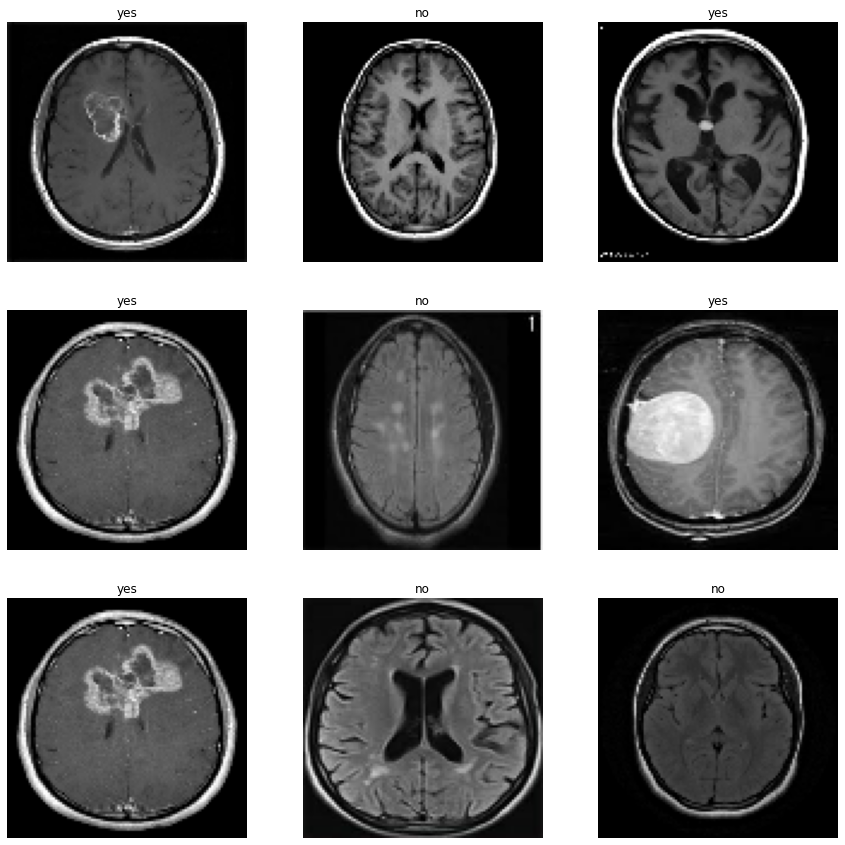

In [896]:
#Graph to check images are in the correct format

visualization = plt.figure(figsize=(10, 10))
visualization.set_figwidth(15)
visualization.set_figheight(15)
for images, labels in brain_mri_rgb.take(1):
  for i in range(9):                #It will show 9 random images from the dataset
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


#Training model

In [897]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_width, img_lenght)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [898]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_rgb = np.array(x_rgb)

In [899]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_44 (Flatten)        (None, 10000)             0         
                                                                 
 dense_88 (Dense)            (None, 128)               1280128   
                                                                 
 dense_89 (Dense)            (None, 2)                 258       
                                                                 
Total params: 1,280,386
Trainable params: 1,280,386
Non-trainable params: 0
_________________________________________________________________


In [900]:
history = model.fit(brain_mri_train,y_train, epochs=60)


Epoch 1/60
7/7 [==============================] - 1s 14ms/step - loss: 2.1625 - accuracy: 0.5714
Epoch 2/60
7/7 [==============================] - 0s 12ms/step - loss: 0.7130 - accuracy: 0.5320
Epoch 3/60
7/7 [==============================] - 0s 14ms/step - loss: 0.6718 - accuracy: 0.5616
Epoch 4/60
7/7 [==============================] - 0s 13ms/step - loss: 0.6241 - accuracy: 0.6404
Epoch 5/60
7/7 [==============================] - 0s 13ms/step - loss: 0.6112 - accuracy: 0.6552
Epoch 6/60
7/7 [==============================] - 0s 13ms/step - loss: 0.5380 - accuracy: 0.7143
Epoch 7/60
7/7 [==============================] - 0s 14ms/step - loss: 0.5054 - accuracy: 0.7734
Epoch 8/60
7/7 [==============================] - 0s 13ms/step - loss: 0.4997 - accuracy: 0.7488
Epoch 9/60
7/7 [==============================] - 0s 17ms/step - loss: 0.4951 - accuracy: 0.7537
Epoch 10/60
7/7 [==============================] - 0s 17ms/step - loss: 0.4706 - accuracy: 0.7931
Epoch 11/60
7/7 [============

In [901]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


2/2 - 0s - loss: 324.9528 - accuracy: 0.5400 - 165ms/epoch - 82ms/step

Test accuracy: 0.5400000214576721


# Predictions

In [902]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[0])


2/2 [==============================] - 0s 9ms/step


1

In [903]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[7])

2/2 [==============================] - 0s 8ms/step


1

In [904]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[9])

2/2 [==============================] - 0s 8ms/step


1

In [905]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[45])

2/2 [==============================] - 0s 9ms/step


0

In [906]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[24])

2/2 [==============================] - 0s 9ms/step


1

In [907]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[32])

2/2 [==============================] - 0s 8ms/step


1

In [908]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[11])

2/2 [==============================] - 0s 8ms/step


1

In [909]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[2])

2/2 [==============================] - 0s 9ms/step


1

In [910]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[19])

2/2 [==============================] - 0s 9ms/step


1

In [911]:
predictions = model.predict(x_test)
#predictions[0]
np.argmax(predictions[41])

2/2 [==============================] - 0s 8ms/step


1

KeyError: ignored

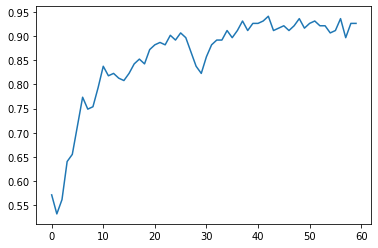

In [912]:
# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")